In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
dataset=pd.read_csv("/content/50_Startups.csv")


In [3]:
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [4]:
dataset.describe()


R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [5]:
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')


There are  50 rows and  5 columns in the dataset.


In [6]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function


There are 0 duplicate values in the dateset.


In [7]:
dataset.isnull().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
c= dataset.corr()
c

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

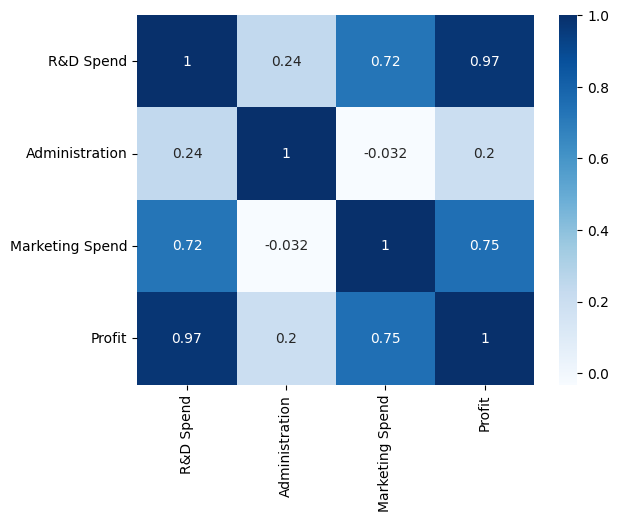

In [10]:
## EDA on dataset
## correlation matrix
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

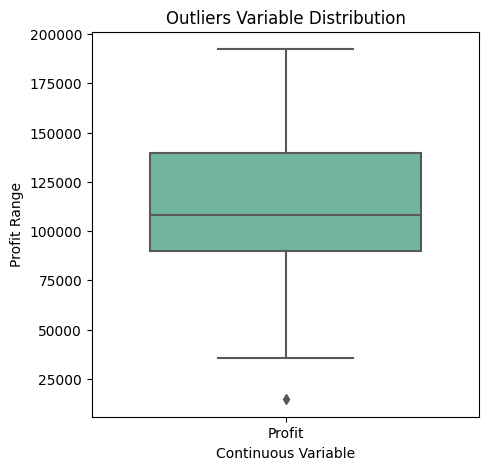

In [11]:
## outliers detection in the target variable
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [5,5]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot ,
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

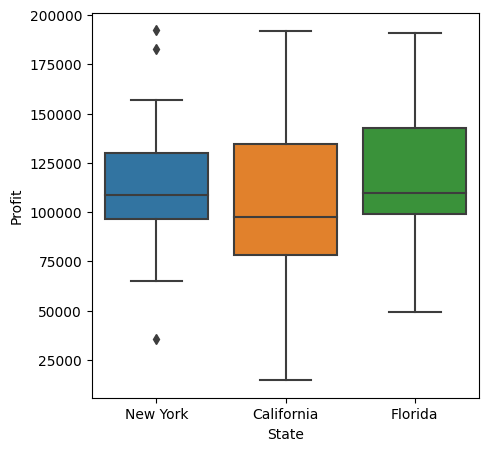

In [12]:
## state-wise outliers detection
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()
## All outliers presented are in New York.
## The startups located in California we can see the maximum


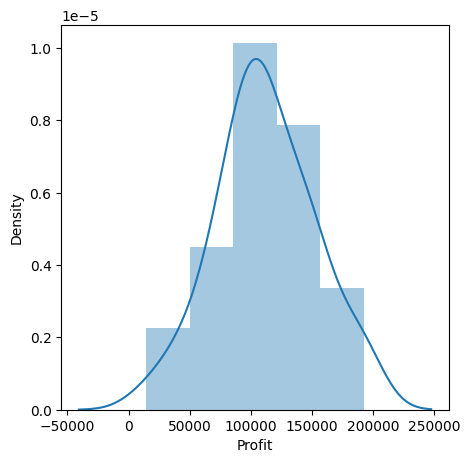

In [13]:
## Histogram on profit
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

In [14]:
# Model Development
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [15]:
## label encoder

from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

0          1          2  3
0   165349.2   136897.8   471784.1  2
1   162597.7  151377.59  443898.53  0
2  153441.51  101145.55  407934.54  1
3  144372.41  118671.85  383199.62  2
4  142107.34   91391.77  366168.42  1

In [17]:
##Now we have to split the data into training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train


array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

#Model Building


In [18]:
import statsmodels.formula.api as smf


In [19]:
data1=dataset.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
dataset

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [20]:
data1[dataset.duplicated()] # No duplicated data


Empty DataFrame
Columns: [RDS, ADMS, MKTS, State, Profit]
Index: []

In [21]:
data1.describe()


RDS           ADMS           MKTS         Profit
count      50.000000      50.000000      50.000000      50.000000
mean    73721.615600  121344.639600  211025.097800  112012.639200
std     45902.256482   28017.802755  122290.310726   40306.180338
min         0.000000   51283.140000       0.000000   14681.400000
25%     39936.370000  103730.875000  129300.132500   90138.902500
50%     73051.080000  122699.795000  212716.240000  107978.190000
75%    101602.800000  144842.180000  299469.085000  139765.977500
max    165349.200000  182645.560000  471784.100000  192261.830000

#Correlation Analysis


In [22]:
data1.corr()


RDS      ADMS      MKTS    Profit
RDS     1.000000  0.241955  0.724248  0.972900
ADMS    0.241955  1.000000 -0.032154  0.200717
MKTS    0.724248 -0.032154  1.000000  0.747766
Profit  0.972900  0.200717  0.747766  1.000000

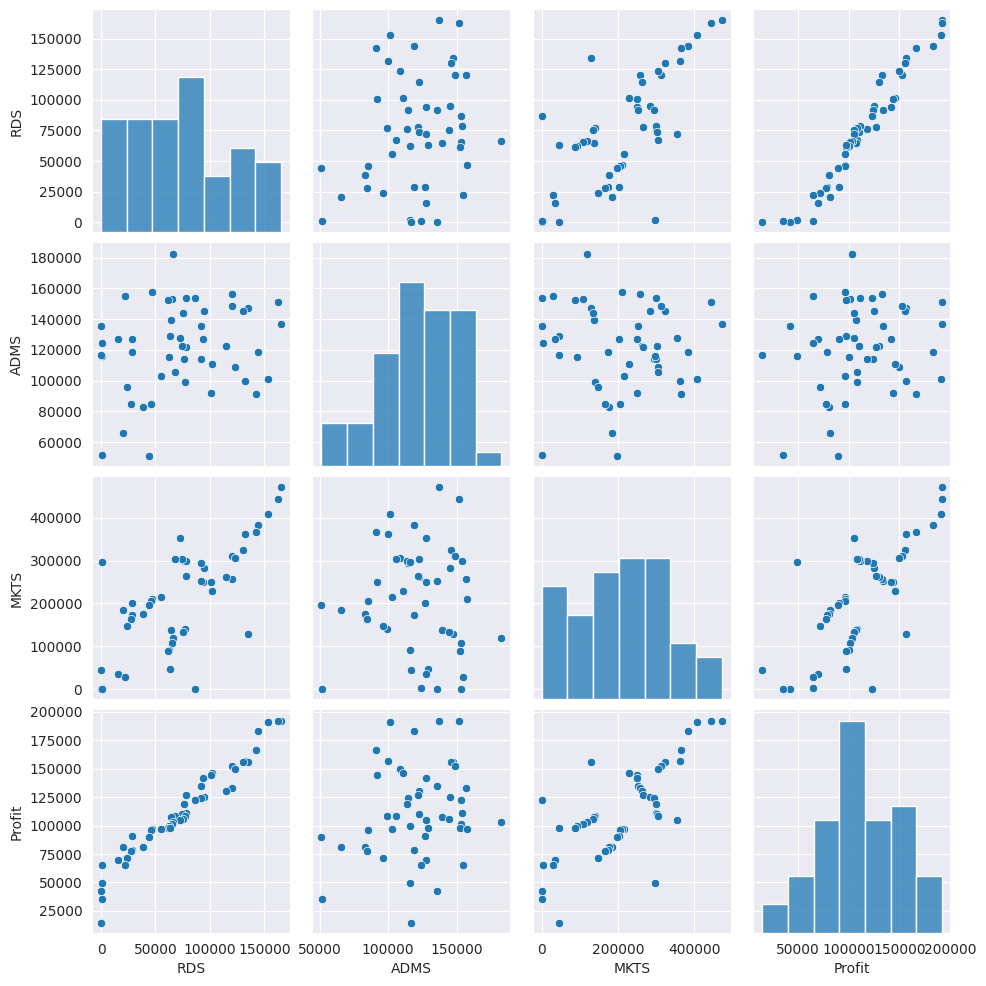

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

#Model Building


In [24]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()


#Model Testing


In [25]:
# Finding Coefficient parameters
model.params


Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [26]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)


(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [27]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%



(0.9507459940683246, 0.9475337762901719)

In [28]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues



In [29]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues  # ADMS has in-significant pvalue


(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [30]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue


(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [31]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

#Two Techniques: 1. Collinearity Check & 2. Residual Analysis


In [32]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df


Variables       Vif
0       RDS  2.468903
1      ADMS  1.175091
2      MKTS  2.326773

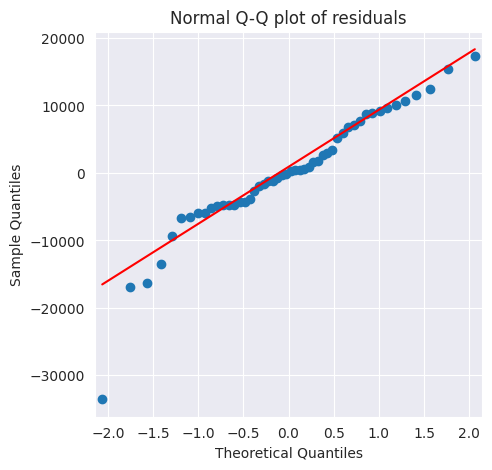

In [33]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
list(np.where(model.resid<-30000))


[array([49])]

In [35]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

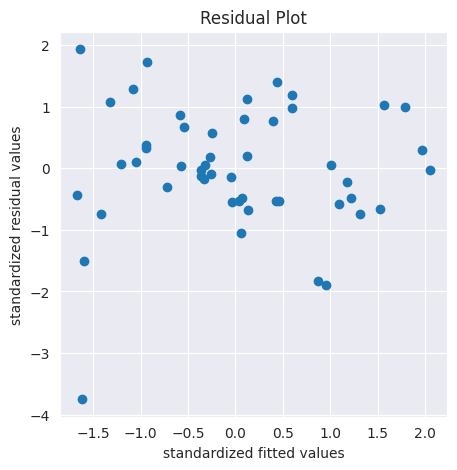

In [36]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

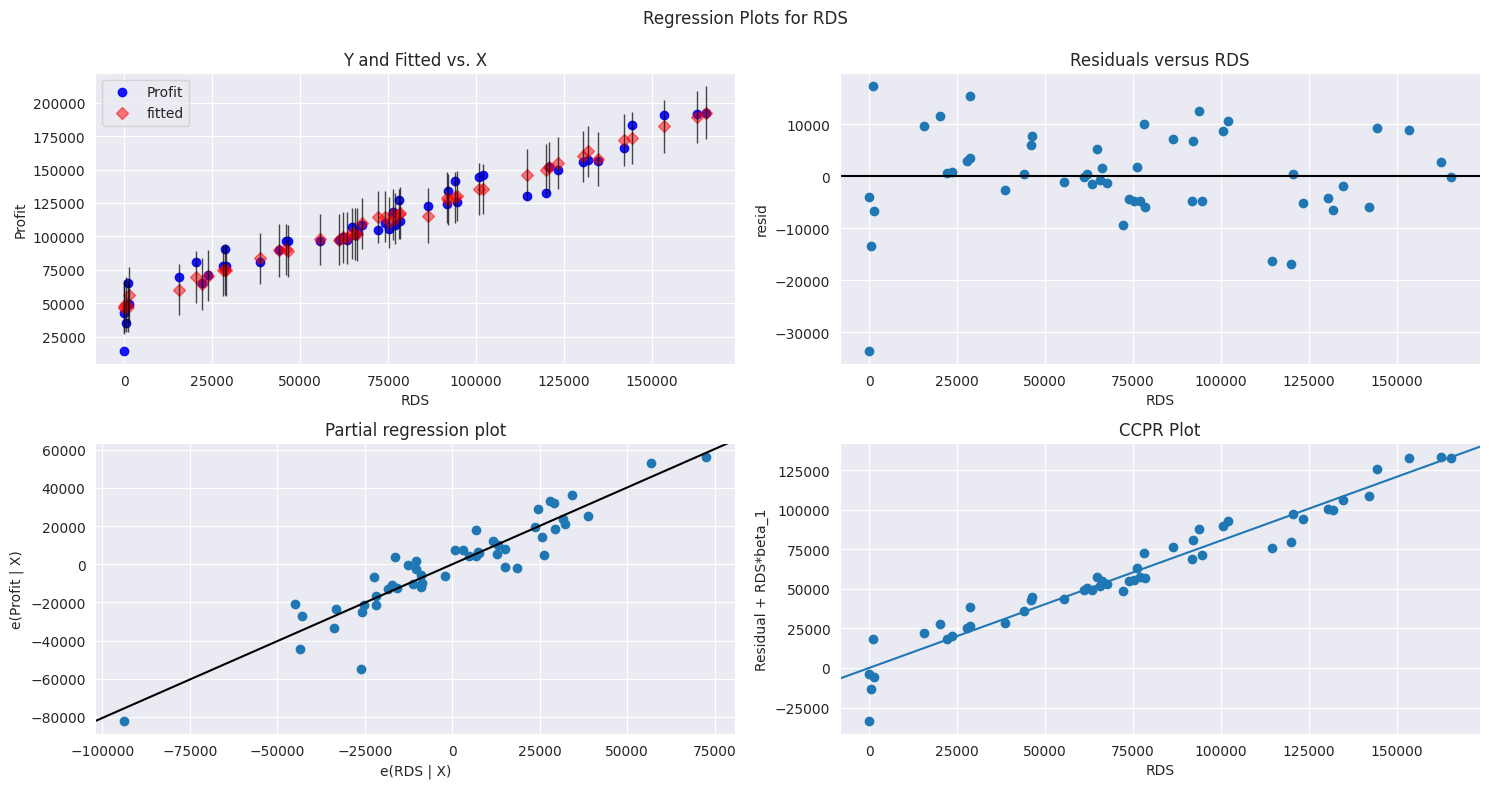

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()


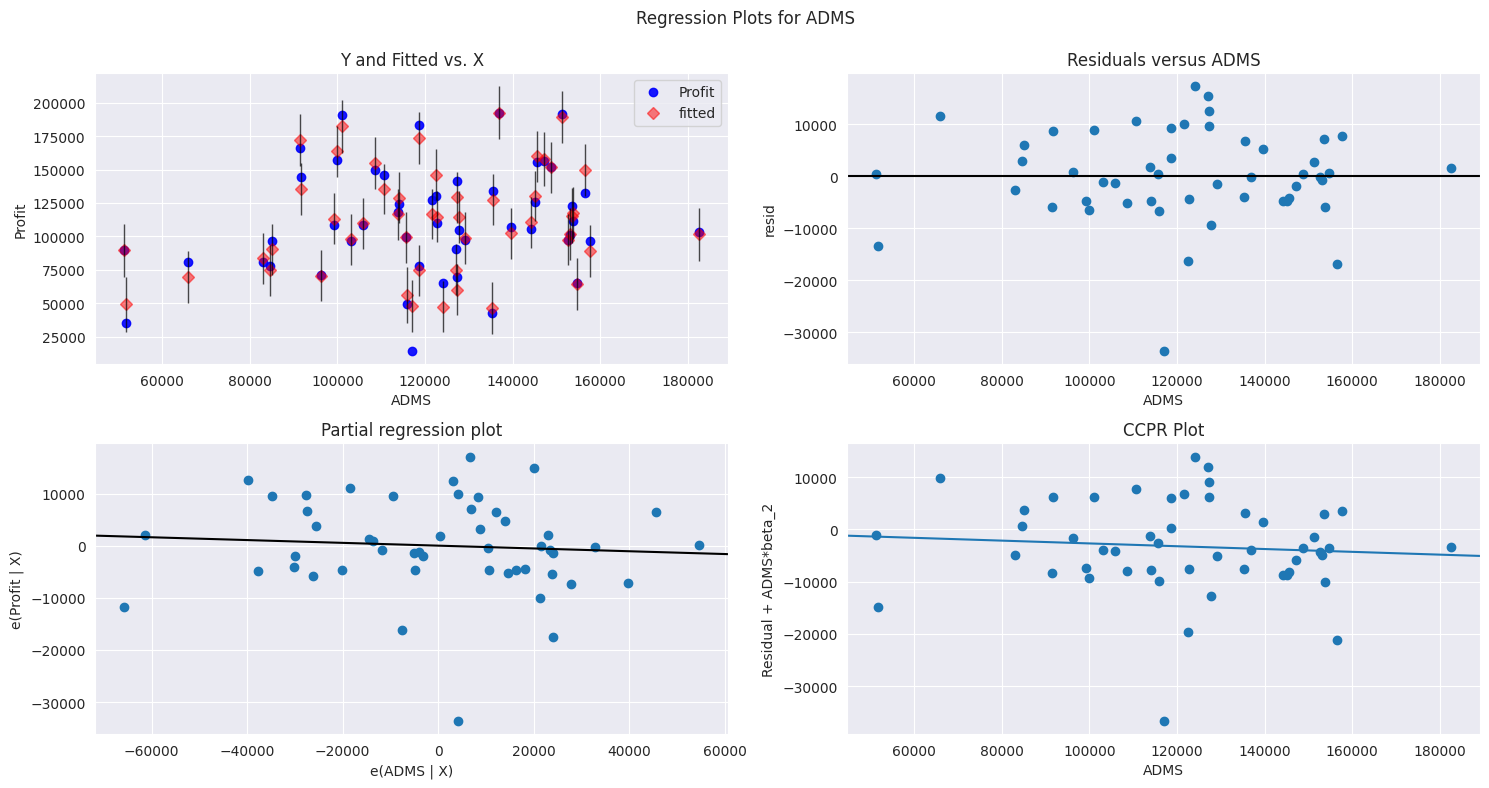

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

#Model Deletion Diagnostics (checking Outliers or Influencers)


Two Techniques : 1. Cook's Distance & 2. Leverage value


In [39]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c


array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

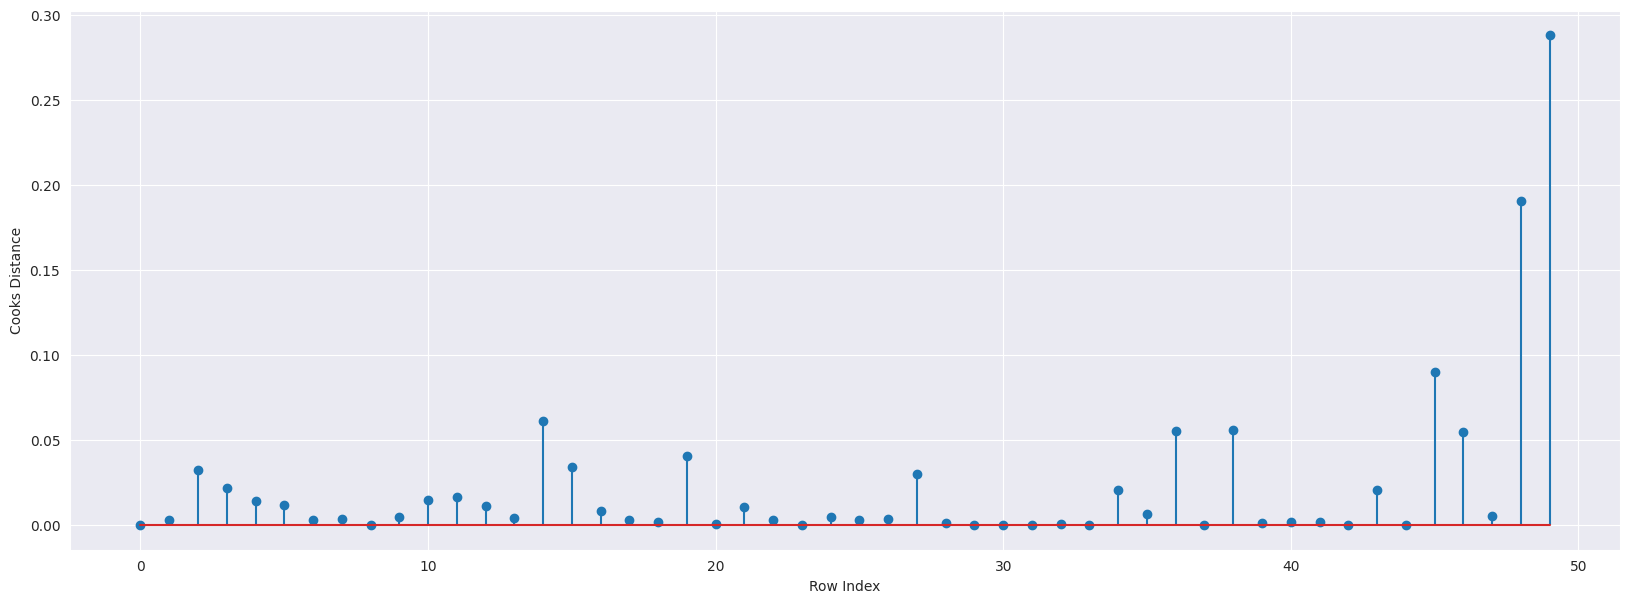

In [40]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [41]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)


(49, 0.2880822927543272)

In [42]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff


0.36

In [43]:
data1[data1.index.isin([49])]


RDS      ADMS      MKTS       State   Profit
49  0.0  116983.8  45173.06  California  14681.4

#Improving the Model


In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head()


RDS       ADMS       MKTS       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

#Model Deletion Diagnostics and Final Model


In [45]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()


In [46]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779906
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [47]:
final_model.rsquared


0.9882757054424702

In [48]:
data2.head()


RDS       ADMS       MKTS       State     Profit
0  142107.34   91391.77  366168.42     Florida  166187.94
1  131876.90   99814.71  362861.36    New York  156991.12
2  130298.13  145530.06  323876.68     Florida  155752.60
3  120542.52  148718.95  311613.29    New York  152211.77
4  123334.88  108679.17  304981.62  California  149759.96

#Model Predictions


In [49]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data


RDS   ADMS    MKTS
0  70000  90000  140000

In [50]:
# Manual Prediction of Price
final_model.predict(new_data)


0    104858.729408
dtype: float64

In [51]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y


0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

#table containing R^2 value for each prepared model


In [52]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table


Prep_Models  Rsquared
0        Model  0.950746
1  Final_Model  0.988276

#Toyota dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [54]:
toyo = pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin-1')


In [55]:
toyo.head()


Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [56]:
## EDA
toyo.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [57]:
toyo.memory_usage().head()


Index          128
Id           11488
Model        11488
Price        11488
Age_08_04    11488
dtype: int64

In [58]:
toyo.loc[:,['Fuel_Type','Price']].head(3)


Fuel_Type  Price
0    Diesel  13500
1    Diesel  13750
2    Diesel  13950

In [59]:
toyo.dtypes.value_counts()


int64     35
object     3
dtype: int64

In [60]:
toyo.select_dtypes(exclude = [object]).head(3)


Id  Price  Age_08_04  Mfg_Month  Mfg_Year     KM  HP  Met_Color  Automatic  \
0   1  13500         23         10      2002  46986  90          1          0   
1   2  13750         23         10      2002  72937  90          1          0   
2   3  13950         24          9      2002  41711  90          1          0   

     cc  ...  Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0  2000  ...             1                1               1      0          0   
1  2000  ...             1                0               1      0          0   
2  2000  ...             0                0               1      0          0   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0            0                 1             0               0        0  
1            0                 1             0               0        0  
2            0                 1             0               0        0  

[3 rows x 35 columns]

In [61]:
toyo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [62]:
print(np.unique(toyo['Doors']))
print(np.unique(toyo['cc']))
print(np.unique(toyo['Automatic']))

[2 3 4 5]
[ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]
[0 1]


In [63]:
toyo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [64]:

toyo['Met_Color'] = toyo['Met_Color'].astype('object')
toyo['Automatic'] = toyo['Automatic'].astype('object')

In [65]:
toyo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   object
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   object
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [66]:
toyo.isnull().sum()


Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [67]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
toyo.drop(columns_to_drop, axis = 1, inplace= True)
toyo.sample(5)


Id  Price  Age_08_04      KM Fuel_Type   HP Met_Color  Color  \
964    968  10950         65   49942    Petrol  110         0    Red   
674    678   6900         68  104000    Petrol   86         1  Green   
1342  1349   8500         77   62285    Petrol  110         1    Red   
108    109  17950         20    7187    Petrol  110         1   Blue   
1320  1327   9400         69   67092    Diesel   72         1  Green   

     Automatic    cc  Doors  Weight  
964          0  1600      3    1065  
674          0  1300      3    1015  
1342         0  1600      5    1075  
108          0  1600      3    1105  
1320         0  2000      3    1115

In [68]:
toyo.describe().T


count          mean           std     min       25%      50%  \
Id         1436.0    721.555014    416.476890     1.0    361.75    721.5   
Price      1436.0  10730.824513   3626.964585  4350.0   8450.00   9900.0   
Age_08_04  1436.0     55.947075     18.599988     1.0     44.00     61.0   
KM         1436.0  68533.259749  37506.448872     1.0  43000.00  63389.5   
HP         1436.0    101.502089     14.981080    69.0     90.00    110.0   
cc         1436.0   1576.855850    424.386770  1300.0   1400.00   1600.0   
Doors      1436.0      4.033426      0.952677     2.0      3.00      4.0   
Weight     1436.0   1072.459610     52.641120  1000.0   1040.00   1070.0   

                75%       max  
Id          1081.25    1442.0  
Price      11950.00   32500.0  
Age_08_04     70.00      80.0  
KM         87020.75  243000.0  
HP           110.00     192.0  
cc          1600.00   16000.0  
Doors          5.00       5.0  
Weight      1085.00    1615.0

In [69]:
toyo.rename(columns = {'Age_08_04':'Age_Months', 'cc':'CC'}, inplace = True)
toyo.sample(2)


Id  Price  Age_Months     KM Fuel_Type  HP Met_Color  Color Automatic  \
987  992   9950          61  44597    Petrol  86         0  White         0   
594  598  10800          50  22500    Petrol  97         1  Green         0   

       CC  Doors  Weight  
987  1300      3    1015  
594  1400      3    1025

In [70]:
toyo.insert(10, "Price_Class", " ")


In [71]:
for i in range(0, len(toyo['Price']), 1):
    if toyo['Price'].iloc[i] <= 8450:
        toyo["Price_Class"].iloc[i] = 'Cheap'
    elif toyo['Price'].iloc[i] >= 11950:
         toyo["Price_Class"].iloc[i] = 'Expensive'
    else:
        toyo['Price_Class'].iloc[i] = 'Average'


In [72]:
toyo.insert(11, "Age", " ")


In [73]:
toyo.describe().T


count          mean           std     min       25%      50%  \
Id          1436.0    721.555014    416.476890     1.0    361.75    721.5   
Price       1436.0  10730.824513   3626.964585  4350.0   8450.00   9900.0   
Age_Months  1436.0     55.947075     18.599988     1.0     44.00     61.0   
KM          1436.0  68533.259749  37506.448872     1.0  43000.00  63389.5   
HP          1436.0    101.502089     14.981080    69.0     90.00    110.0   
CC          1436.0   1576.855850    424.386770  1300.0   1400.00   1600.0   
Doors       1436.0      4.033426      0.952677     2.0      3.00      4.0   
Weight      1436.0   1072.459610     52.641120  1000.0   1040.00   1070.0   

                 75%       max  
Id           1081.25    1442.0  
Price       11950.00   32500.0  
Age_Months     70.00      80.0  
KM          87020.75  243000.0  
HP            110.00     192.0  
CC           1600.00   16000.0  
Doors           5.00       5.0  
Weight       1085.00    1615.0

In [74]:
i = 0
while i < len(toyo['Age_Months']):
    if toyo['Age_Months'].iloc[i] <= 44:
        toyo['Age'].iloc[i] = 'New Model'

    elif toyo['Age_Months'].iloc[i] >= 70:
        toyo['Age'].iloc[i] = 'Very Old'

    else:
        toyo['Age'].iloc[i] = 'Old'
    i+=1

In [75]:
toyo['Age'].value_counts()


Old          689
New Model    378
Very Old     369
Name: Age, dtype: int64

In [76]:
toyo['Price_Class'].value_counts()


Average      704
Cheap        369
Expensive    363
Name: Price_Class, dtype: int64

In [77]:
toyo.head()


Id  Price  Age_Months     KM Fuel_Type  HP Met_Color   Color Automatic  \
0   1  13500          23  46986    Diesel  90         1    Blue         0   
1   2  13750          23  72937    Diesel  90         1  Silver         0   
2   3  13950          24  41711    Diesel  90         1    Blue         0   
3   4  14950          26  48000    Diesel  90         0   Black         0   
4   5  13750          30  38500    Diesel  90         0   Black         0   

     CC Price_Class        Age  Doors  Weight  
0  2000   Expensive  New Model      3    1165  
1  2000   Expensive  New Model      3    1165  
2  2000   Expensive  New Model      3    1165  
3  2000   Expensive  New Model      3    1165  
4  2000   Expensive  New Model      3    1170

In [78]:
toyo.insert(12, "Age-Year",0)


In [79]:
toyo.insert(12, 'KM/Month', 0)


In [80]:
toyo.head()


Id  Price  Age_Months     KM Fuel_Type  HP Met_Color   Color Automatic  \
0   1  13500          23  46986    Diesel  90         1    Blue         0   
1   2  13750          23  72937    Diesel  90         1  Silver         0   
2   3  13950          24  41711    Diesel  90         1    Blue         0   
3   4  14950          26  48000    Diesel  90         0   Black         0   
4   5  13750          30  38500    Diesel  90         0   Black         0   

     CC Price_Class        Age  KM/Month  Age-Year  Doors  Weight  
0  2000   Expensive  New Model         0         0      3    1165  
1  2000   Expensive  New Model         0         0      3    1165  
2  2000   Expensive  New Model         0         0      3    1165  
3  2000   Expensive  New Model         0         0      3    1165  
4  2000   Expensive  New Model         0         0      3    1170

In [81]:
def conversion(val1, val2):
    val_con = val1/12
    ratio   = val2/val1
    return [val_con, ratio]

In [82]:
toyo['Age-Year'], toyo['KM/Month'] = conversion(toyo['Age_Months'], toyo['KM'])


In [83]:
toyo.sample(5)


Id  Price  Age_Months      KM Fuel_Type   HP Met_Color Color  \
467    470  11950          56   66777    Petrol  110         0   Red   
1001  1006   8950          66   39222    Petrol   86         1   Red   
1178  1184   8250          72   93066    Petrol  110         1  Grey   
554    558  11950          49   40836    Petrol  110         0  Grey   
1057  1062   6500          78  176000    Petrol   86         0  Grey   

     Automatic    CC Price_Class       Age     KM/Month  Age-Year  Doors  \
467          0  1600   Expensive       Old  1192.446429  4.666667      5   
1001         1  1300     Average       Old   594.272727  5.500000      3   
1178         0  1600       Cheap  Very Old  1292.583333  6.000000      5   
554          1  1600   Expensive       Old   833.387755  4.083333      3   
1057         0  1300       Cheap  Very Old  2256.410256  6.500000      5   

      Weight  
467     1090  
1001    1045  
1178    1075  
554     1075  
1057    1035

In [84]:
toyo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1436 non-null   int64  
 1   Price        1436 non-null   int64  
 2   Age_Months   1436 non-null   int64  
 3   KM           1436 non-null   int64  
 4   Fuel_Type    1436 non-null   object 
 5   HP           1436 non-null   int64  
 6   Met_Color    1436 non-null   object 
 7   Color        1436 non-null   object 
 8   Automatic    1436 non-null   object 
 9   CC           1436 non-null   int64  
 10  Price_Class  1436 non-null   object 
 11  Age          1436 non-null   object 
 12  KM/Month     1436 non-null   float64
 13  Age-Year     1436 non-null   float64
 14  Doors        1436 non-null   int64  
 15  Weight       1436 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 179.6+ KB


In [85]:
pd.crosstab(index = toyo['Fuel_Type'], columns = 'count', dropna = True)


col_0      count
Fuel_Type       
CNG           17
Diesel       155
Petrol      1264

In [86]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'], dropna = True)  #two-way table


Fuel_Type  CNG  Diesel  Petrol
Automatic                     
0           16     155    1185
1            1       0      79

In [87]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'], normalize = True, dropna = True)
#two-way table, joint-probability


Fuel_Type       CNG    Diesel    Petrol
Automatic                              
0          0.011142  0.107939  0.825209
1          0.000696  0.000000  0.055014

In [88]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'],margins = True, normalize = True, dropna = True)
#two-way table, marginal probability


Fuel_Type       CNG    Diesel    Petrol      All
Automatic                                       
0          0.011142  0.107939  0.825209  0.94429
1          0.000696  0.000000  0.055014  0.05571
All        0.011838  0.107939  0.880223  1.00000

In [89]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'],margins = True, normalize = 'index', dropna = True)
#two-way-conditional-probability


Fuel_Type       CNG    Diesel    Petrol
Automatic                              
0          0.011799  0.114307  0.873894
1          0.012500  0.000000  0.987500
All        0.011838  0.107939  0.880223

In [90]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)


Fuel_Type       CNG  Diesel  Petrol      All
Automatic                                   
0          0.941176     1.0  0.9375  0.94429
1          0.058824     0.0  0.0625  0.05571

In [91]:
numerical_data = toyo.select_dtypes(exclude = [object])
print(numerical_data.shape)


(1436, 10)


In [92]:
corr_matrix = numerical_data.corr()
corr_matrix


Id     Price  Age_Months        KM        HP        CC  \
Id          1.000000 -0.738250    0.906132  0.273298 -0.109375 -0.117704   
Price      -0.738250  1.000000   -0.876590 -0.569960  0.314990  0.126389   
Age_Months  0.906132 -0.876590    1.000000  0.505672 -0.156622 -0.098084   
KM          0.273298 -0.569960    0.505672  1.000000 -0.333538  0.102683   
HP         -0.109375  0.314990   -0.156622 -0.333538  1.000000  0.035856   
CC         -0.117704  0.126389   -0.098084  0.102683  0.035856  1.000000   
KM/Month   -0.302098 -0.023369   -0.125711  0.724024 -0.260631  0.175403   
Age-Year    0.906132 -0.876590    1.000000  0.505672 -0.156622 -0.098084   
Doors      -0.130207  0.185326   -0.148359 -0.036197  0.092424  0.079903   
Weight     -0.414500  0.581198   -0.470253 -0.028598  0.089614  0.335637   

            KM/Month  Age-Year     Doors    Weight  
Id         -0.302098  0.906132 -0.130207 -0.414500  
Price      -0.023369 -0.876590  0.185326  0.581198  
Age_Months -0.125711  1.000000 -0.148359 -0.470253  
KM          0.724024  0.505672 -0.036197 -0.028598  
HP         -0.260631 -0.156622  0.092424  0.089614  
CC          0.175403 -0.098084  0.079903  0.335637  
KM/Month    1.000000 -0.125711  0.049075  0.324752  
Age-Year   -0.125711  1.000000 -0.148359 -0.470253  
Doors       0.049075 -0.148359  1.000000  0.302618  
Weight      0.324752 -0.470253  0.302618  1.000000

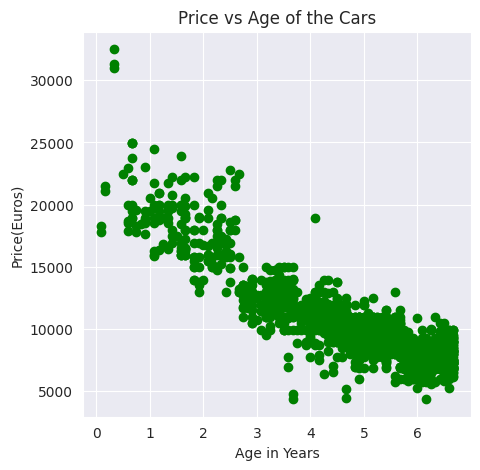

In [94]:
import matplotlib.pyplot as plt
plt.scatter(toyo['Age-Year'], toyo['Price'], c = 'green')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()


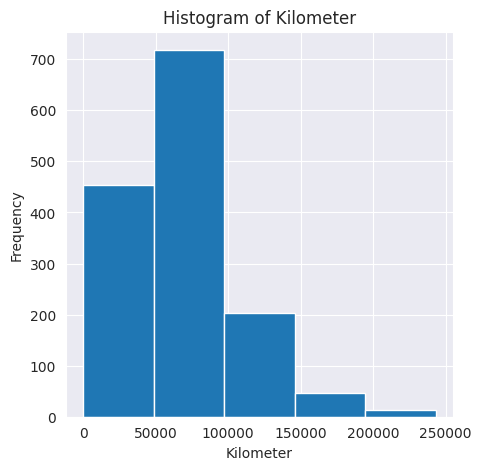

In [95]:
plt.hist(toyo['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()


<Axes: title={'center': 'Bar plot of Fuel Type'}, ylabel='Fuel Type'>

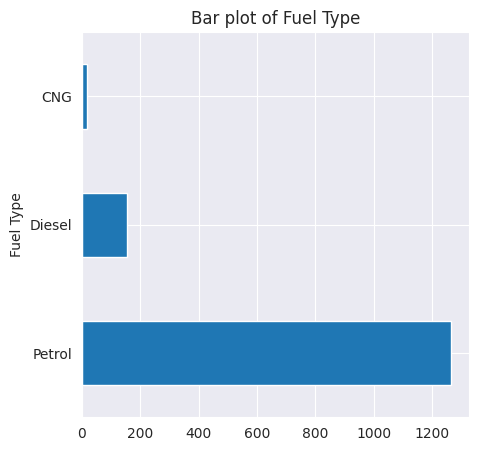

In [96]:
fuel_count = pd.value_counts(toyo['Fuel_Type'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.title('Bar plot of Fuel Type')
fuel_count.plot.barh()


In [97]:
toyo.head()


Id  Price  Age_Months     KM Fuel_Type  HP Met_Color   Color Automatic  \
0   1  13500          23  46986    Diesel  90         1    Blue         0   
1   2  13750          23  72937    Diesel  90         1  Silver         0   
2   3  13950          24  41711    Diesel  90         1    Blue         0   
3   4  14950          26  48000    Diesel  90         0   Black         0   
4   5  13750          30  38500    Diesel  90         0   Black         0   

     CC Price_Class        Age     KM/Month  Age-Year  Doors  Weight  
0  2000   Expensive  New Model  2042.869565  1.916667      3    1165  
1  2000   Expensive  New Model  3171.173913  1.916667      3    1165  
2  2000   Expensive  New Model  1737.958333  2.000000      3    1165  
3  2000   Expensive  New Model  1846.153846  2.166667      3    1165  
4  2000   Expensive  New Model  1283.333333  2.500000      3    1170

<Axes: xlabel='Age-Year', ylabel='Price'>

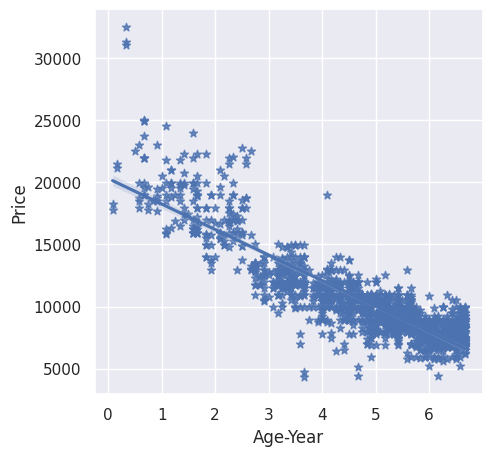

In [98]:
sns.set(style = 'darkgrid')
sns.regplot(x = toyo['Age-Year'], y = toyo['Price'], marker = '*')


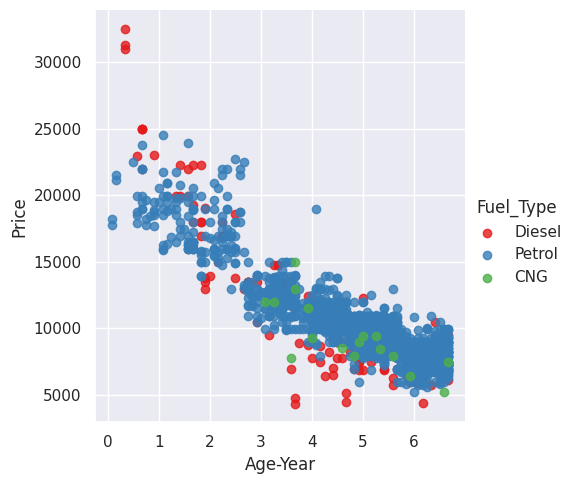

In [99]:
sns.lmplot(x = 'Age-Year', y = 'Price', data = toyo, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')


<Axes: xlabel='Age_Months'>

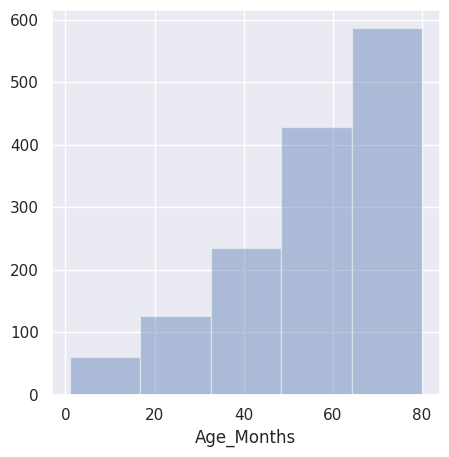

In [100]:
sns.distplot(toyo['Age_Months'], kde = False, bins = 5)


<Axes: xlabel='Fuel_Type', ylabel='count'>

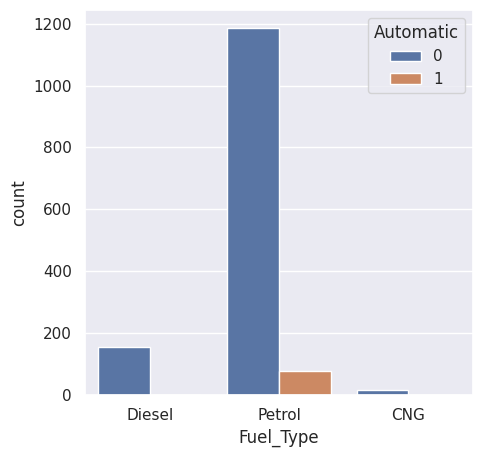

In [101]:
sns.countplot(x = 'Fuel_Type', data = toyo, hue = 'Automatic')


<Axes: xlabel='Fuel_Type', ylabel='Price'>

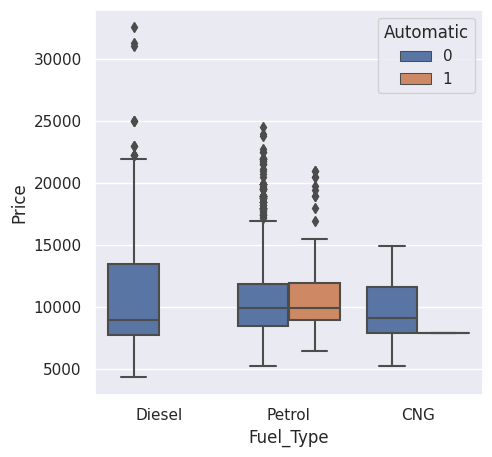

In [102]:
sns.boxplot(y = toyo['Price'], x = toyo['Fuel_Type'], hue = toyo['Automatic'])


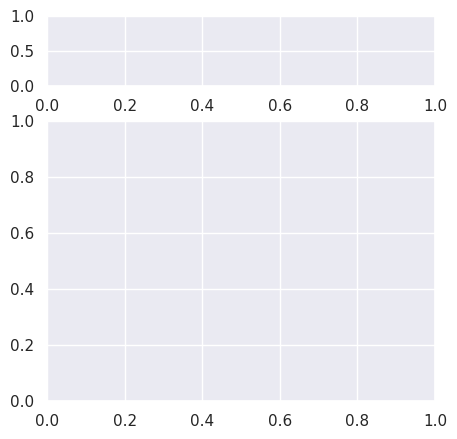

In [103]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})


<Axes: xlabel='Price'>

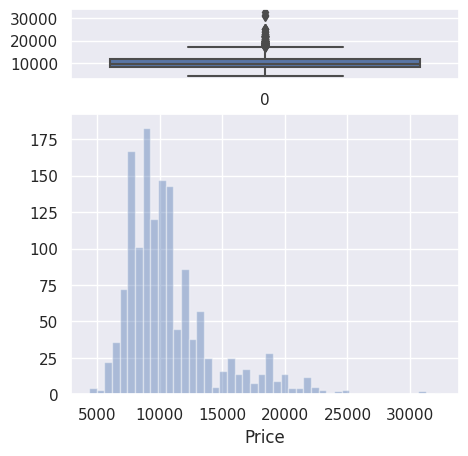

In [104]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(toyo['Price'], ax = ax_box)
sns.distplot(toyo['Price'], ax = ax_hist, kde = False)


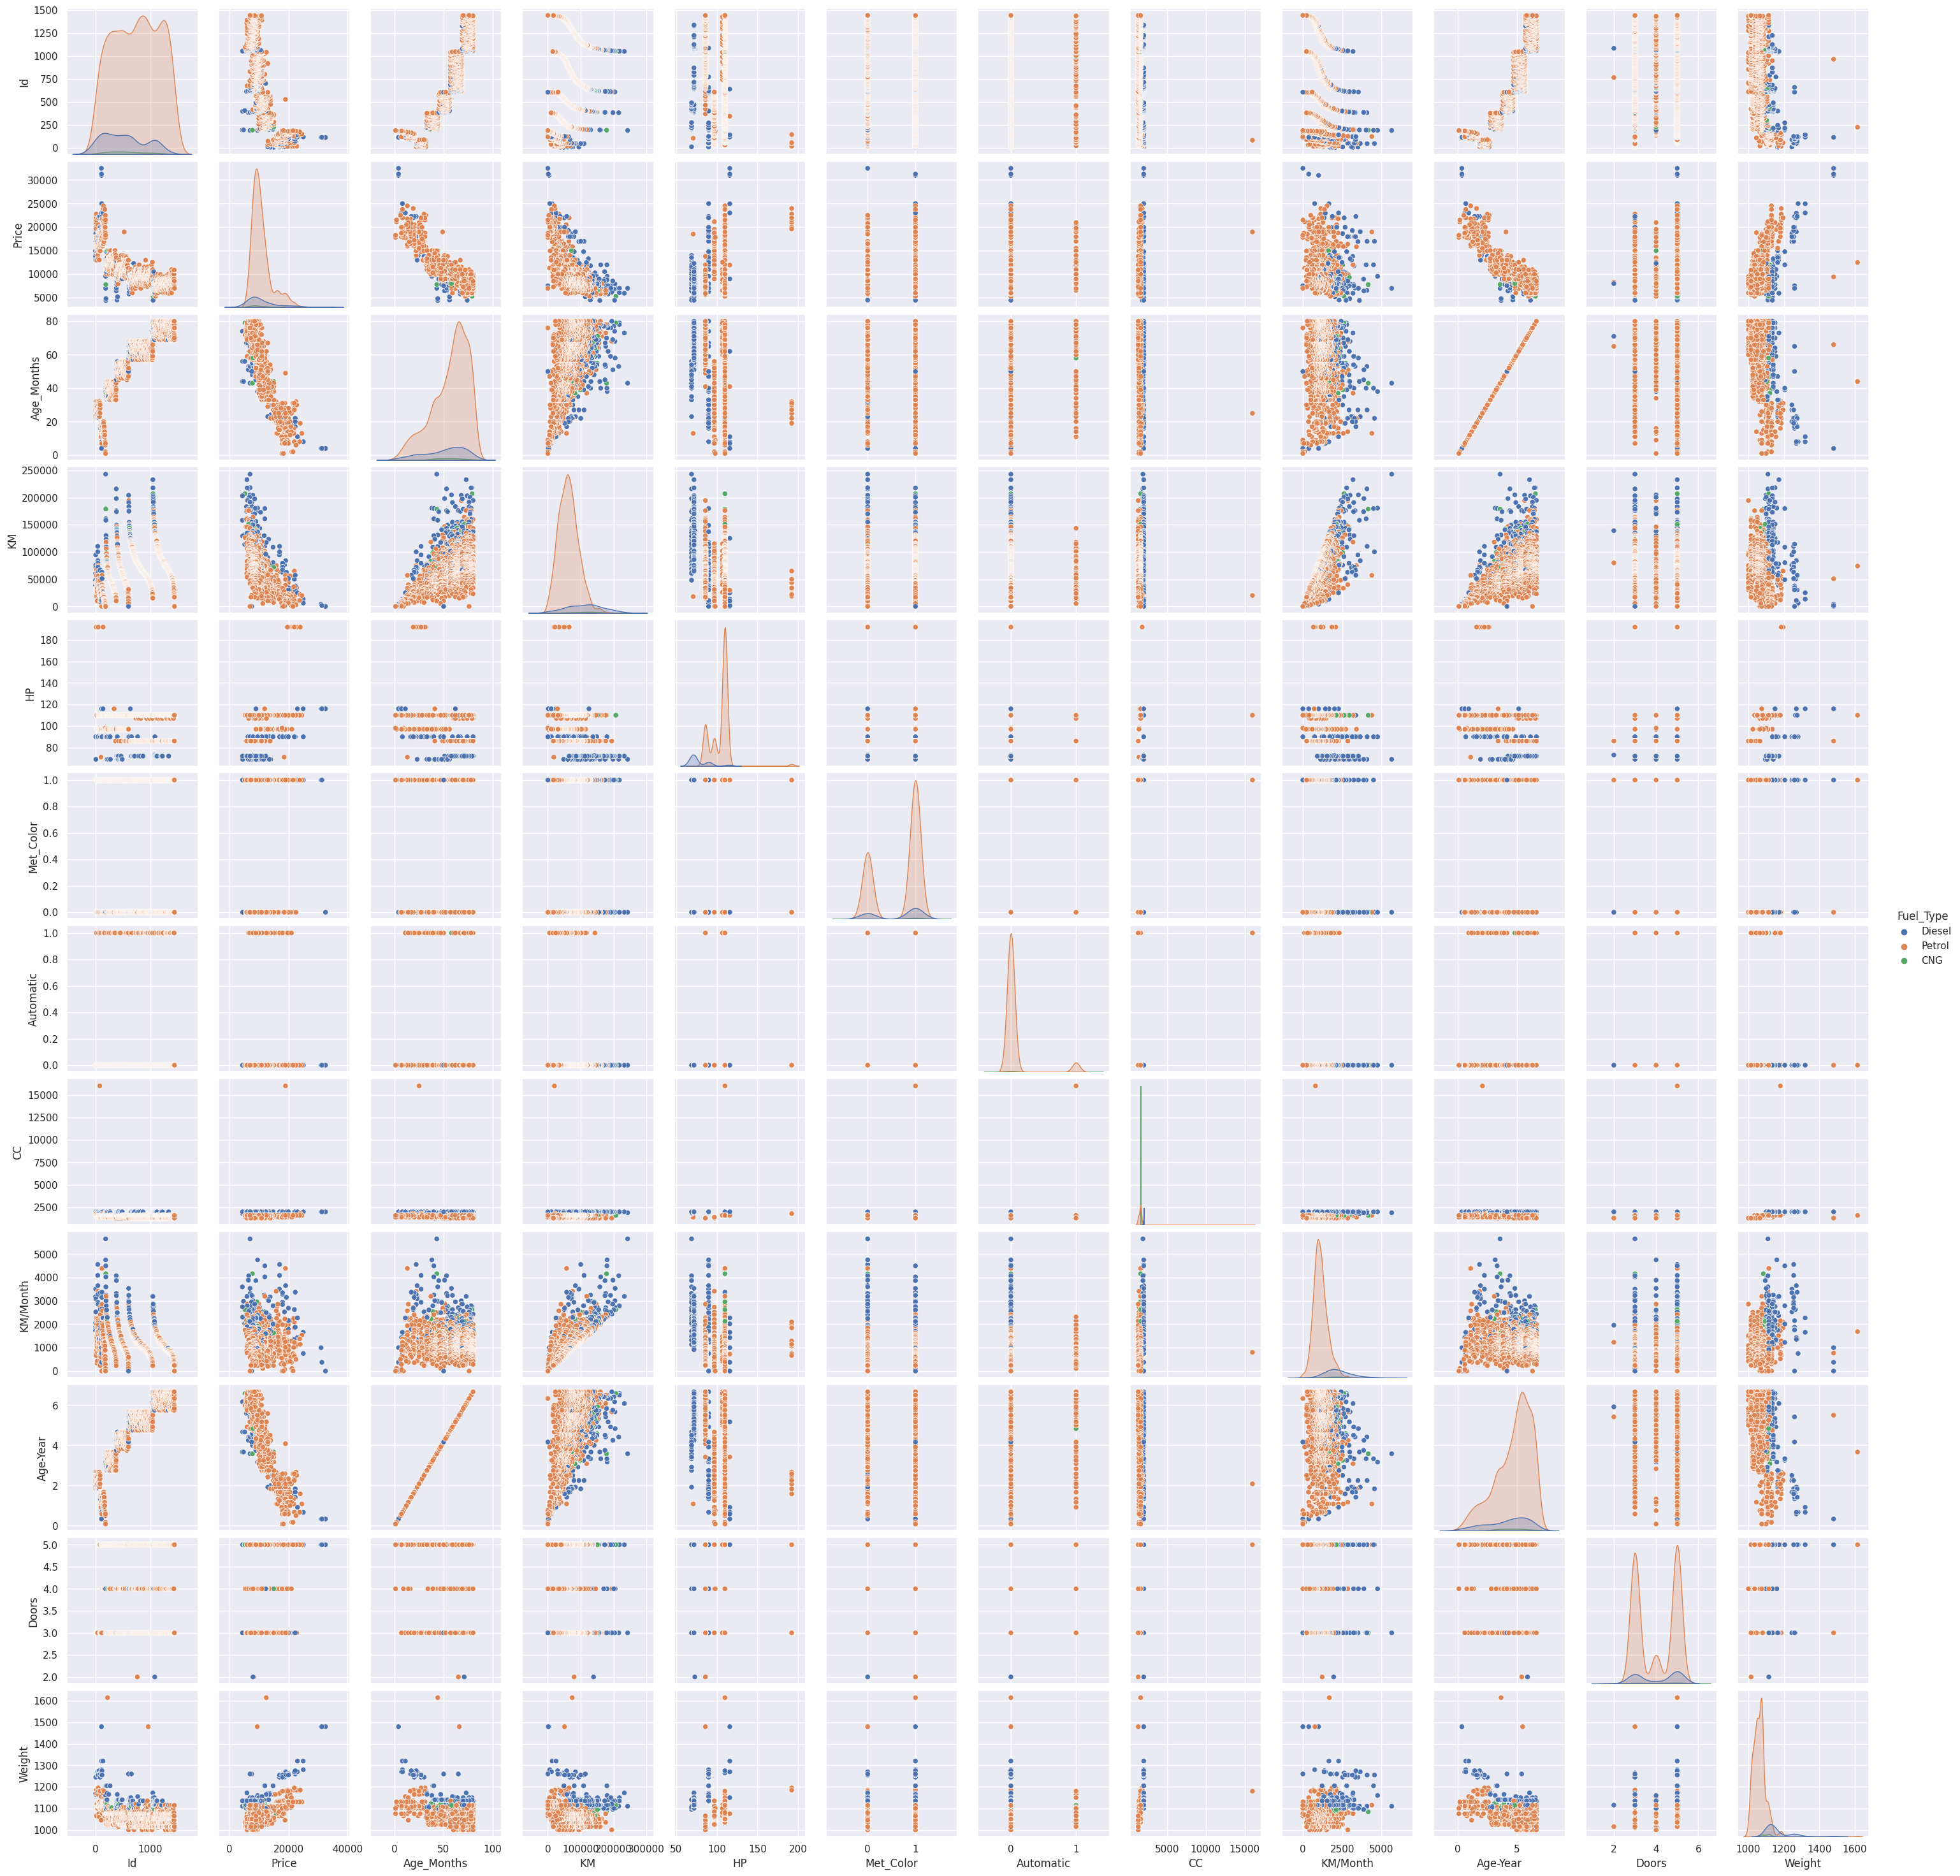

In [105]:
sns.pairplot(toyo, kind = 'scatter', hue = 'Fuel_Type')
